<div align = center>
<h2> Feature extraction</h2>
</div>

Let’s consider the Iris flower data set that contains 150 data instances, and 4
data features.
- Get the data, and then give a short description using corresponding
statistical indicators.
- Clean the data by dealing with missing values, dropping unnecessary
features, standardizing the data...etc.
- Extract new featuring using PCA, and rank them according to their
variance.

- Test different configurations to build a clustering model using K-
Means algorithm by: <br>
 (a) testing different number of features <br>
 (b)different number of Clusters. <br>
 (c) different similarity measures. <br>
o Use a density based technique to examine your model, <br>
o Examine the size of the generated clusters. <br>
- Visualize and interpret results.

<center>
<img src = 'iris_species.jpg' height = 370 width=1000>


</center>

In [182]:
import pandas as pd
import numpy as np
print(pd.__version__)

2.1.3


### Note : 
To load the iris dataset, we can either :
- Load the csv file and use pd.read_csv()
- Load the iris dataset from sklearn using datasets.load_iris and converting it to pd dataframe

In [183]:
df = pd.read_csv("Iris.csv", index_col= 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [184]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [185]:
from sklearn import datasets

iris = datasets.load_iris()
df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [186]:
df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [187]:
df2.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [188]:
# data is already cleaned
df2.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [189]:
df2.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [190]:
np.mean(df2,axis=0)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

The data is clean already , there is no specifi data wrangling needed in our case and we assume that all features are necessary

### Optional : standardizing from scratch

In [191]:
# standardise the data
def standardize_data(df:pd.core.frame.DataFrame)-> pd.core.frame.DataFrame:
    '''With Z-score'''
    return (df-np.mean(df, axis=None)/ np.std(df, axis=None))

stand_df = standardize_data(df2)
    

C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [192]:
stand_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.902139,-4.475167,-0.569133,-4.360397
1,0.702139,-4.975167,-0.569133,-4.360397
2,0.502139,-4.775167,-0.669133,-4.360397
3,0.402139,-4.875167,-0.469133,-4.360397
4,0.802139,-4.375167,-0.569133,-4.360397
...,...,...,...,...
145,2.502139,-4.975167,3.230867,-2.260397
146,2.102139,-5.475167,3.030867,-2.660397
147,2.302139,-4.975167,3.230867,-2.560397
148,2.002139,-4.575167,3.430867,-2.260397


In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

stand_df = scaler.fit_transform(df2)


In [194]:
stand_df = pd.DataFrame(stand_df, columns=iris.feature_names)
stand_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [195]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(stand_df)
evr = pca.explained_variance_ratio_

sorted_vars = sorted(enumerate(evr), key=lambda x:x[1], reverse=True)
sorted_vars
for idx, var in sorted_vars :
    print(f'Factoral axis : {idx}  with variance : {var}')

Factoral axis : 0  with variance : 0.7296244541329985
Factoral axis : 1  with variance : 0.22850761786701787
Factoral axis : 2  with variance : 0.036689218892828765
Factoral axis : 3  with variance : 0.005178709107154798


In [196]:
print(evr)

[0.72962445 0.22850762 0.03668922 0.00517871]


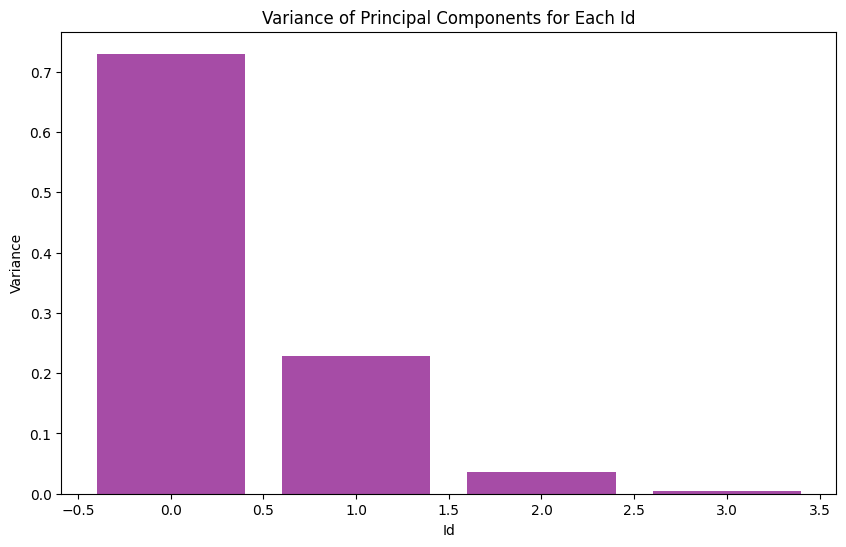

In [197]:
import matplotlib.pyplot as plt

ids= [idx for idx, _ in sorted_vars]
id_variance_tuples = [(ids[idx], var) for idx, var in sorted_vars]

# Unpack the tuples for plotting
ids, variances = zip(*id_variance_tuples)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ids, variances, color='purple', alpha=0.7)
plt.xlabel('Id')
plt.ylabel('Variance')
plt.title('Variance of Principal Components for Each Id')
plt.show()

The first and second feature conbined explain $0.958 \% $ of the dataset variance


In [198]:
from sklearn.cluster import KMeans

# The configuration
num_features = 2
num_clusters = 3
similarity_measure = 'euclidean'

kmeans = KMeans(n_clusters=num_clusters)
stand_df['cluster'] = kmeans.fit_predict(stand_df.iloc[:, :num_features])

C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


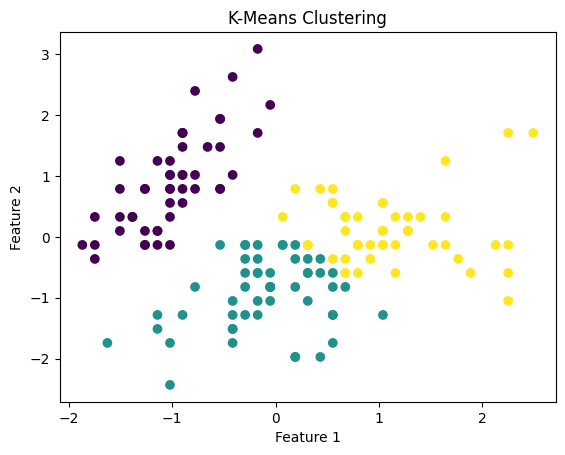

In [203]:
from sklearn.cluster import DBSCAN

# The configuration
eps_value = 0.5
min_samples_value = 25


dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
stand_df['dbscan_cluster'] = dbscan.fit_predict(stand_df.iloc[:, :num_features])

plt.scatter(stand_df.iloc[:, 0], stand_df.iloc[:, 1], c=stand_df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

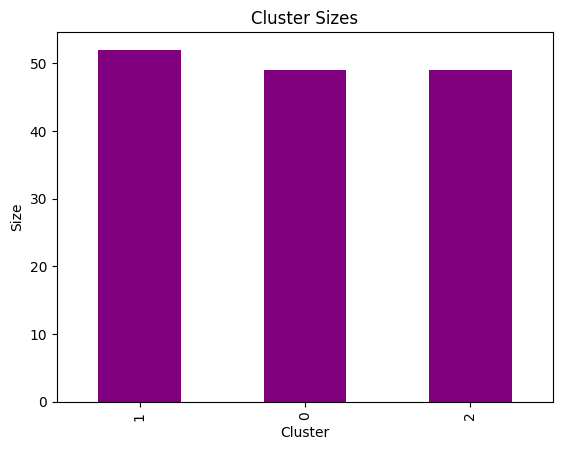

In [204]:
cluster_sizes = stand_df['cluster'].value_counts()
cluster_sizes.plot(kind='bar', title='Cluster Sizes', color='purple')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.show()

In [211]:
stand_df['cluster'].value_counts()

cluster
1    52
0    49
2    49
Name: count, dtype: int64

In [215]:
df['Species'].groupby(stand_df['cluster']).value_counts()

cluster  Species        
0.0      Iris-setosa        48
1.0      Iris-versicolor    35
         Iris-virginica     16
         Iris-setosa         1
2.0      Iris-virginica     33
         Iris-versicolor    15
         Iris-setosa         1
Name: count, dtype: int64

There are 3 species of iris in the irirs dataset


In [202]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [208]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score

def test_combinations(X):
    results = []

    for num_features in range(1, X.shape[1] + 1):
        for num_clusters in range(2, 6):
            for metric in ['euclidean', 'manhattan', 'cosine']:
                # Select the first num_features columns
                selected_features = X[:, :num_features]

                # Calculate pairwise distances based on the selected metric
                if metric == 'cosine':
                    selected_features = StandardScaler().fit_transform(selected_features)
                    dist_matrix = pairwise_distances(selected_features, metric='cosine')
                else:
                    dist_matrix = pairwise_distances(selected_features, metric=metric)

                # Apply K-Means using precomputed distance matrix
                kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, init='k-means++')
                labels = kmeans.fit_predict(dist_matrix)

                # Evaluate clustering performance (use appropriate metrics)
                silhouette = silhouette_score(selected_features, labels)

                # Store results
                results.append({
                    'Num Features': num_features,
                    'Num Clusters': num_clusters,
                    'Metric': metric,
                    'Silhouette Score': silhouette
                })

    return pd.DataFrame(results)



C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


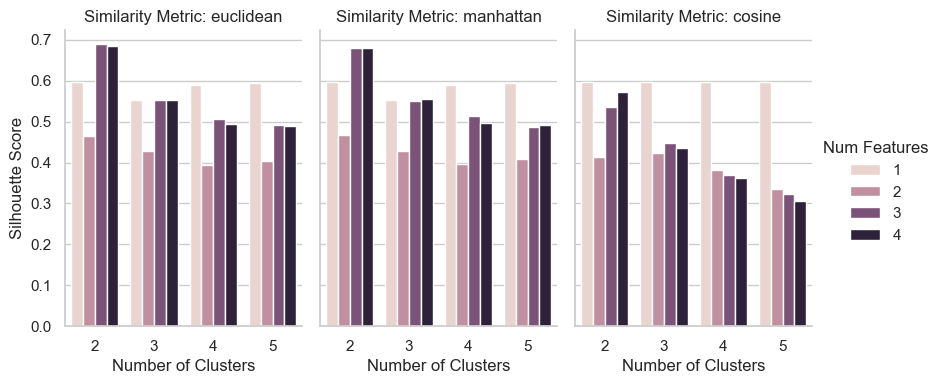

In [217]:
import seaborn as sns

df_results = test_combinations(X)

sns.set(style="whitegrid")
g = sns.catplot(
    x="Num Clusters", y="Silhouette Score", hue="Num Features",
    col="Metric", data=df_results, kind="bar",
    height=4, aspect=0.7
)

g.set_axis_labels("Number of Clusters", "Silhouette Score")
g.set_titles("Similarity Metric: {col_name}")

plt.show()